## Observations and Insights 

In [ ]:
## Observations
#1 There are 248 mice after we removed the one, split pretty evenly by gender, 125 male to 123 female
#2 There are 1880 measurements taken for the 248 mice.
#    "Capomulin", "Ramicane"  have around 230 measurements
#     the rest have between 150-190
#3 Of the 4 drug regimens  ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]  , Capomulin and Ramicane 
#    have lower ranges of tumor volumes when looking at the boxplots side by side
#    the upper outlier bound on Infubinol and Ceftamin in the 80s versus th 50s for Capomulin and Ramicane 
#4 Looking at one mouse on Capomulin - tumor volume went down over the time
#5 looking at the regression, per regression model lower weight correlates to higher tumor volume. 
#    but r-squared is only .05 indicating even though there is a trend 
#    data is noisy and variable from the regression line

   

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df.head(100)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2


In [3]:
# Checking the number of mice.
merge_df['Mouse ID'].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
DupMice = merge_df[merge_df.duplicated(subset = ['Mouse ID','Timepoint'] , keep=False)]

DistinctDupMiceList = list(set(DupMice['Mouse ID'].to_list()))

#Print distinct MiceID with Dup rows on MouseID and Timepoint
print(DistinctDupMiceList)

#Show rows with dup on MouseID and Timepoint
print(DupMice)

['g989']
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.57039

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Drop all rows with the MouseID in DistinctDupMiceList
cleanMerge = merge_df

for d in DistinctDupMiceList:
    cleanMerge = cleanMerge[cleanMerge['Mouse ID'] != d]

cleanMerge.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
z969      Naftisol      Male    9           30          45         73.867845           4                   1
i386      Infubinol     Female  23          29          20         55.087724           2                   1
i334      Ramicane      Female  8           20          10         41.631247           0                   1
                                                        15         39.158001           0                   1
                                                        20         39.687832           0                   1
                                                                                                          ..
q633      Zoniferol     Male    12          25          5          47.183802           0                   1
                                                        10         49.001866           0                   1
                        

In [7]:
# Checking the number of mice in the clean DataFrame.
cleanMerge['Mouse ID'].nunique()

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
cleanMergeGroup = cleanMerge.groupby(['Drug Regimen'])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
Count = cleanMergeGroup['Tumor Volume (mm3)'].count()
Mean = cleanMergeGroup['Tumor Volume (mm3)'].mean()
Median = cleanMergeGroup['Tumor Volume (mm3)'].median()
Variance = cleanMergeGroup['Tumor Volume (mm3)'].var()
StDev = cleanMergeGroup['Tumor Volume (mm3)'].std()
SEM = cleanMergeGroup['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
TumorVolumeSummary= pd.DataFrame({"RowCount": Count,
                      "Mean": Mean,
                      "Median": Median,           
                      "Variance": Variance,
                      "Standard Deviation":StDev,
                      "SEM":SEM})

TumorVolumeSummary


,RowCount,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,148,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

cleanMergeGroup.agg({'Tumor Volume (mm3)':['mean', 'median','var','std','sem']}) 
 

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Count of Measurements')

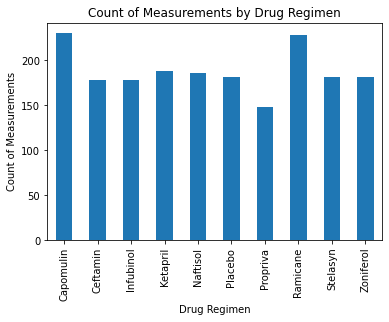

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_measurements = cleanMergeGroup['Drug Regimen'].count()
count_chart = count_measurements.plot(kind = 'bar',title="Count of Measurements by Drug Regimen")
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Count of Measurements")



Text(0, 0.5, 'Count of Measurements')

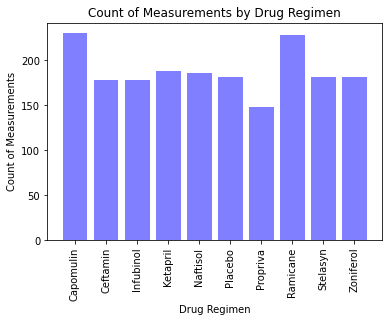

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
CleanMergeRegimenGroupCount = cleanMerge.groupby(['Drug Regimen']).count().reset_index()

x_axis = np.arange(len(cleanMergeGroup['Drug Regimen'].count()))
plt.bar(CleanMergeRegimenGroupCount['Drug Regimen'].values, cleanMergeGroup['Drug Regimen'].count(), color='b', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, CleanMergeRegimenGroupCount['Drug Regimen'].values,rotation = 90)
plt.title("Count of Measurements by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Measurements")


([<matplotlib.patches.Wedge at 0x201b93fad30>,
 [Text(-0.7176837777416648, -0.8336246128602807, 'Female'),
  Text(0.7176837777416649, 0.8336246128602806, 'Male')],
 [Text(-0.39146387876818073, -0.45470433428742574, '49.6%'),
  Text(0.39146387876818084, 0.4547043342874257, '50.4%')])

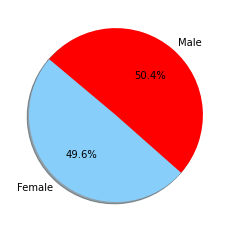

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Remove Mice with dup rows on MouseID and Timepoint from mouse_metadata
MouseDF=mouse_metadata

for d in DistinctDupMiceList:
    MouseDF = MouseDF[MouseDF['Mouse ID'] != d]

#Prep dataframes for piechart
MouseGenderCount = MouseDF.groupby(['Sex']).count().reset_index()
GenderGroupDF = MouseDF.groupby(['Sex'])

#Piechart
labels = MouseGenderCount['Sex'].values
sizes = GenderGroupDF['Sex'].count() 
colors = ["lightskyblue","red"]
plt.pie(sizes,  labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
MouseTimepoint= cleanMerge[['Mouse ID','Timepoint']]
MouseTimepointGroup = MouseTimepoint.groupby("Mouse ID")
Max = MouseTimepointGroup.max()
Max = Max.reset_index()
MouseTimepointGroup.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
MouseTimepointMerge = pd.merge(Max, cleanMerge, on=("Mouse ID","Timepoint"))

MouseTimepointMerge.value_counts()



Mouse ID  Timepoint  Drug Regimen  Sex     Age_months  Weight (g)  Tumor Volume (mm3)  Metastatic Sites
z969      45         Naftisol      Male    9           30          73.867845           4                   1
i334      45         Ramicane      Female  8           20          36.374510           2                   1
j755      45         Naftisol      Male    23          27          69.563621           1                   1
j365      45         Zoniferol     Male    24          28          64.294085           2                   1
j296      45         Ceftamin      Female  24          30          61.849023           3                   1
                                                                                                          ..
q787      45         Placebo       Male    17          27          66.096475           3                   1
q633      45         Zoniferol     Male    12          25          70.827796           2                   1
q610      35         Ram

In [16]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in Treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    LoopDF = MouseTimepointMerge[MouseTimepointMerge['Drug Regimen'] == i]
    
    # add subset 
    vol = LoopDF['Tumor Volume (mm3)']
    
    # Determine outliers using upper and lower bounds
    quartiles = vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    UpperOutlier = LoopDF[(LoopDF['Tumor Volume (mm3)']>upper_bound) ]['Tumor Volume (mm3)'].to_list()
    LowerOutlier = LoopDF[(LoopDF['Tumor Volume (mm3)']<lower_bound) ]['Tumor Volume (mm3)'].to_list()
    
    print(f"{i}:The lower quartile is: {lowerq}")
    print(f"{i}:The upper quartile is: {upperq}")
    print(f"{i}:The interquartile range is: {iqr}")
    print(f"{i}:Values below {lower_bound} or above {upper_bound} could be outliers.")
    if len(UpperOutlier)==0 and len(LowerOutlier)==0:
        print(f"{i}:Tumor Volume values for this Drug Regimen are not in outlier range of less than {lower_bound} or greater than {upper_bound}")
    if len(UpperOutlier)>0:
        print(i+":Upper outliers are:"+str(UpperOutlier))
    if len(LowerOutlier)>0:
        print(i+":Lower outliers are:"+str(LowerOutlier))
    
    
    

Capomulin:The lower quartile is: 32.37735684
Capomulin:The upper quartile is: 40.1592203
Capomulin:The interquartile range is: 7.781863460000004
Capomulin:Values below 20.7 or above 51.83 could be outliers.
Capomulin:Tumor Volume values for this Drug Regimen are not in outlier range of less than 20.7 or greater than 51.83
Ramicane:The lower quartile is: 31.56046955
Ramicane:The upper quartile is: 40.65900627
Ramicane:The interquartile range is: 9.098536719999998
Ramicane:Values below 17.91 or above 54.31 could be outliers.
Ramicane:Tumor Volume values for this Drug Regimen are not in outlier range of less than 17.91 or greater than 54.31
Infubinol:The lower quartile is: 54.04860769
Infubinol:The upper quartile is: 65.52574285
Infubinol:The interquartile range is: 11.477135160000003
Infubinol:Values below 36.83 or above 82.74 could be outliers.
Infubinol:Lower outliers are:[36.321345799999996]
Ceftamin:The lower quartile is: 48.72207785
Ceftamin:The upper quartile is: 64.29983003
Ceftam

([<matplotlib.axis.XTick at 0x201b943e310>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

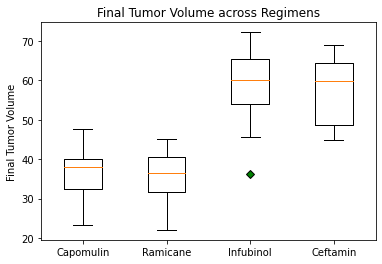

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
green_diamond = dict(markerfacecolor='g', marker='D')
d1 = MouseTimepointMerge[MouseTimepointMerge['Drug Regimen'] =="Capomulin" ]['Tumor Volume (mm3)'].to_list()
d2 = MouseTimepointMerge[MouseTimepointMerge['Drug Regimen'] =="Ramicane" ]['Tumor Volume (mm3)'].to_list()
d3 = MouseTimepointMerge[MouseTimepointMerge['Drug Regimen'] =="Infubinol" ]['Tumor Volume (mm3)'].to_list()
d4 = MouseTimepointMerge[MouseTimepointMerge['Drug Regimen'] =="Ceftamin" ]['Tumor Volume (mm3)'].to_list()

PlotsData = [d1, d2, d3,d4]
fig7, ax7 = plt.subplots()
ax7.set_title('Final Tumor Volume across Regimens')
ax7.boxplot(PlotsData, flierprops=green_diamond)
ax7.set_ylabel('Final Tumor Volume')
plt.xticks([1, 2, 3,4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])


## Line and Scatter Plots

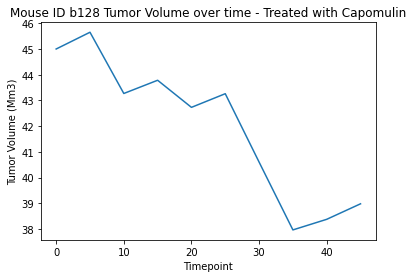

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
OneMouseDF = cleanMerge[cleanMerge['Mouse ID'] == 'b128']

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = OneMouseDF['Timepoint'].to_list()

# Create a random array of data that we will use for our y values
data = OneMouseDF['Tumor Volume (mm3)'].to_list()

plt.plot(x_axis, data)
plt.title("Mouse ID b128 Tumor Volume over time - Treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (Mm3)")
plt.show()

this is MeanTumorVol Length:25
this is WeightData Length:25


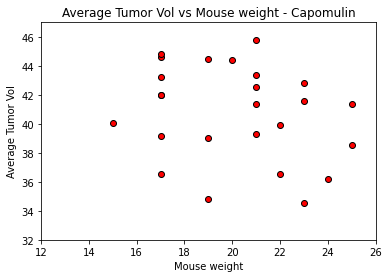

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x_values = MouseDF[MouseDF['Drug Regimen'] == 'Capomulin']['Weight (g)']
y_values = cleanMerge[cleanMerge['Drug Regimen'] == 'Capomulin'].groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()

print('this is MeanTumorVol Length:'+str(len(y_values)))
print('this is WeightData Length:'+str(len(x_values)))
plt.ylim(32,47)
plt.xlim(12,26)
plt.xlabel("Mouse weight")
plt.ylabel("Average Tumor Vol")
plt.title('Average Tumor Vol vs Mouse weight - Capomulin')
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black")


## Correlation and Regression

The r-squared is: 0.0538301465353424
The correlation between both factors is -0.23
The regression model is y = -0.26x + 46.05


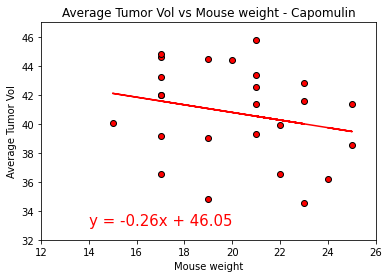

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Print out the r-squared value along with the plot.

x_values = MouseDF[MouseDF['Drug Regimen'] == 'Capomulin']['Weight (g)'].astype(float)
y_values = cleanMerge[cleanMerge['Drug Regimen'] == 'Capomulin'].groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values,y_values)

plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(14,33),fontsize=15,color="red")
plt.ylim(32,47)
plt.xlim(12,26)
plt.xlabel("Mouse weight")
plt.ylabel("Average Tumor Vol")
plt.title('Average Tumor Vol vs Mouse weight - Capomulin')

print(f"The r-squared is: {rvalue**2}")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The regression model is {line_eq}")
plt.show()
